In [1]:
# Change the current working directory

import os

os.chdir("C:\\Users\\Dell 3400\\Desktop\\Projects")

In [2]:
# Get the current working directory

os.getcwd

<function nt.getcwd()>

In [3]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Load the sales data from the CSV file into a DataFrame

sales= pd.read_csv("C:\\Users\\Dell 3400\\Desktop\\Projects\\EDA Sales Data.csv", encoding= 'latin1')

In [5]:
# Display the first 5 rows of the sales DataFrame to get a quick look at the data

sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
# Get a summary of the sales DataFrame

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Drop the "Status" and "unnamed1" columns from the sales DataFrame

sales.drop(["Status", "unnamed1"], axis = 1, inplace = True)

# Display the first 5 rows of the updated sales DataFrame to confirm the columns were removed

sales.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Check for missing values in each column of the sales DataFrame

sales.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Remove all rows with missing values from the sales DataFrame

sales.dropna(inplace = True)

In [10]:
# Check again for any remaining missing values in each column of the sales DataFrame

sales.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
# Convert the 'Amount' column in the sales DataFrame to integers

sales['Amount'] = sales['Amount'].astype('int')

In [12]:
# Check the data type of the 'Amount' column to confirm it has been converted to integers

sales['Amount'].dtypes

dtype('int32')

In [13]:
# Rename columns 'Marital_Status' to 'Relationship_Status' and 'Amount' to 'Sales' in the sales DataFrame

sales.rename(columns = {'Marital_Status' : 'Relationship_Status', 'Amount' : 'Sales'}, inplace = True)

In [14]:
# Generate descriptive statistics of the numerical columns in the sales DataFrame

sales.describe()

,User_ID,Age,Relationship_Status,Orders,Sales
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

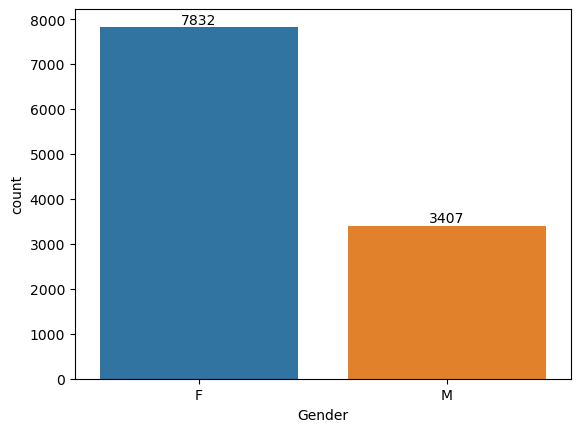

In [15]:
# Create a count plot of the 'Gender' column in the sales DataFrame using seaborn

cp = sns.countplot(x= 'Gender', data = sales)

for bars in cp.containers:
    cp.bar_label(bars)

In [16]:
# Group the sales DataFrame by 'Gender', calculate the sum of 'Sales' for each gender,
# sort the results in descending order based on 'Sales', and store the result in 'sales_gender'

sales_gender = sales.groupby(['Gender'], as_index = False)['Sales'].sum().sort_values(by= 'Sales', ascending = False)
sales_gender.head()

,Gender,Sales
0,F,74335853
1,M,31913276


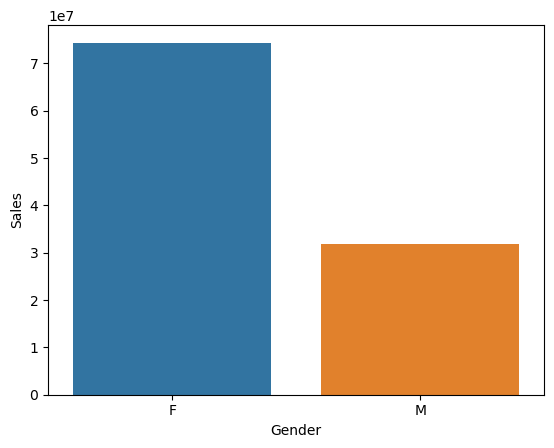

In [17]:
# Create a bar plot using seaborn to visualize the total sales ('Sales') by gender ('Gender')

bp = sns.barplot(x = 'Gender', y = 'Sales', data = sales_gender)

The analysis reveals that the majority of buyers are females, and they demonstrate a higher purchasing power compared to males.

## Age

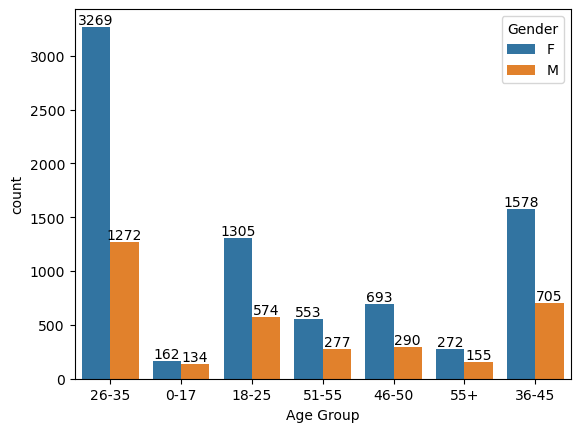

In [18]:
# Create a count plot using seaborn to visualize the count of each age group ('Age Group') by gender ('Gender')

age = sns.countplot(data = sales, x = 'Age Group', hue = 'Gender')

for bars in age.containers:
    age.bar_label(bars)

The data shows that the largest group of buyers falls within the 26-35 age bracket, with females predominantly represented in this demographic.

In [19]:
## State

<Axes: xlabel='State', ylabel='Orders'>

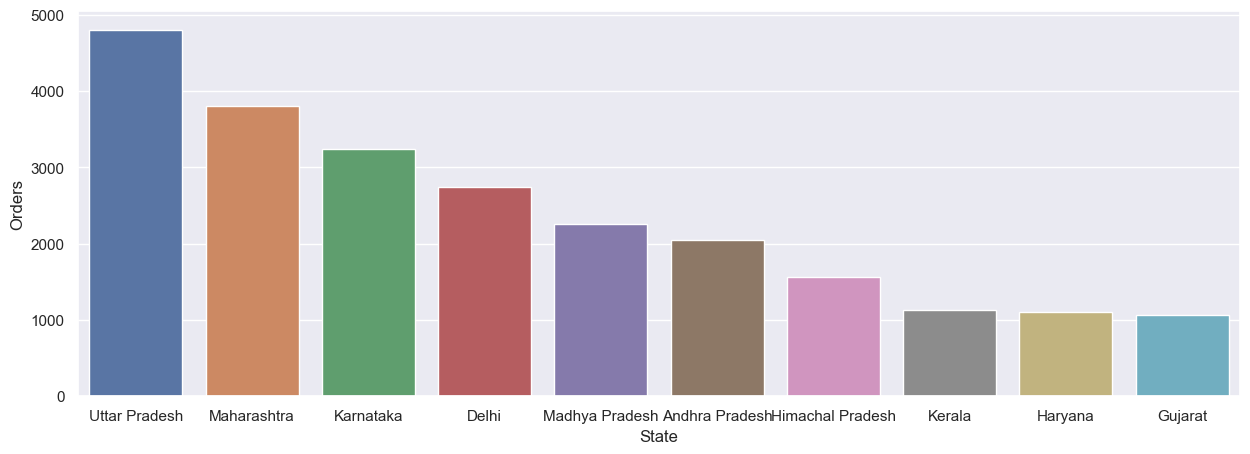

In [20]:
# Group the sales DataFrame by 'State', calculate the sum of 'Orders' for each state,
# sort the results in descending order based on 'Orders', select the top 10 states,
# and store the result in 'state_orders'

state_orders = sales.groupby (['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (15, 5)})
sns.barplot(data = state_orders, x= 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Sales'>

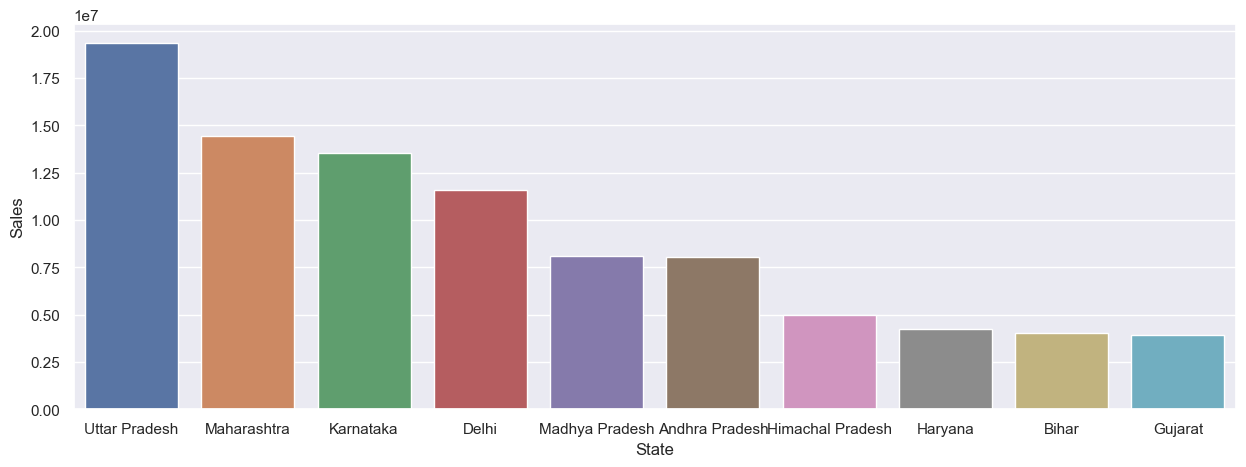

In [21]:
# Group the sales DataFrame by 'State', calculate the total sales ('Sales') for each state,
# sort the results in descending order based on 'Sales', select the top 10 states,
# and store the result in 'state_sales'

state_sales = sales.groupby(['State'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = state_sales, x = 'State', y = 'Sales')

Uttar Pradesh, Maharashtra, and Karnataka are the top three states in terms of both the number of sales and total sales amount.

## Relationship_Status

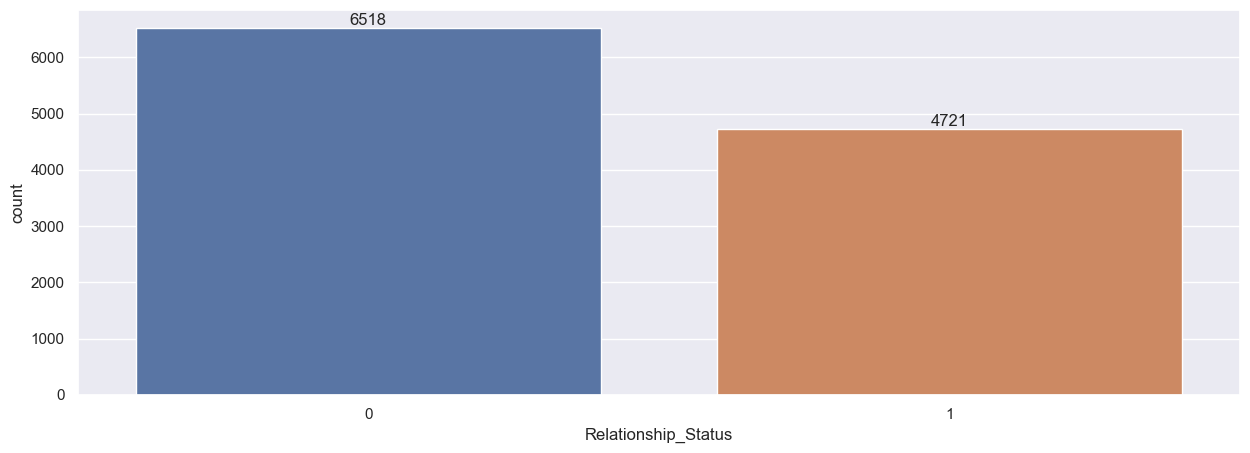

In [22]:
# Create a count plot using seaborn to visualize the count of each relationship status ('Relationship_Status')

ms = sns.countplot(data = sales, x = 'Relationship_Status')

sns.set(rc = {'figure.figsize' : (5,2)})
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Relationship_Status', ylabel='Sales'>

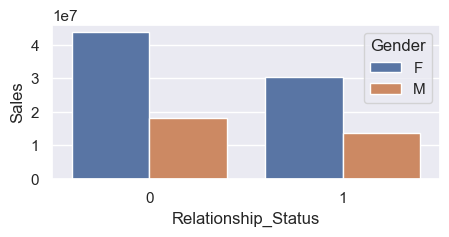

In [23]:
# Group the sales DataFrame by 'Relationship_Status' and 'Gender', calculate the total sales ('Sales') for each group,
# sort the results in descending order based on 'Sales', and store the result in 'married_sales'

married_sales = sales.groupby(['Relationship_Status', 'Gender'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

# Create a bar plot using seaborn to visualize the total sales ('Sales') by relationship status ('Relationship_Status'),
# grouped by gender ('Gender')

sns.set(rc = {'figure.figsize' : (5,2)})
sns.barplot(data = married_sales, x = 'Relationship_Status', y = 'Sales', hue = 'Gender')

The analysis indicates that the majority of buyers are married women, who exhibit a significant purchasing power compared to other demographic groups.

## Occupation

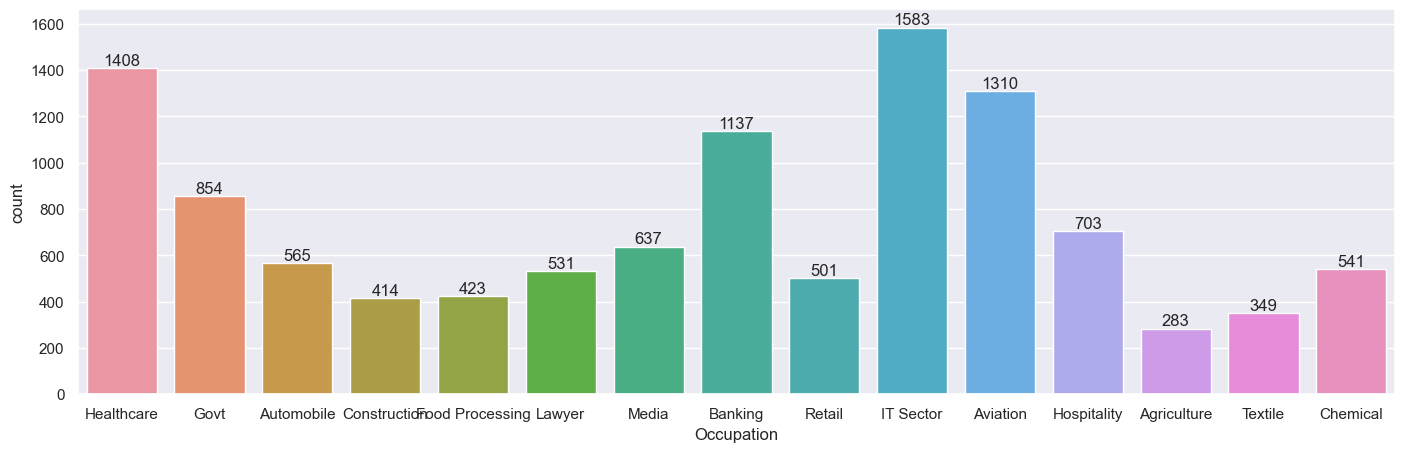

In [24]:
# Create a count plot using seaborn to visualize the count of each occupation ('Occupation')

sns.set(rc = {'figure.figsize' : (17, 5)})
oc = sns.countplot(data = sales, x = 'Occupation')

for bars in oc.containers:
    oc.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Sales'>

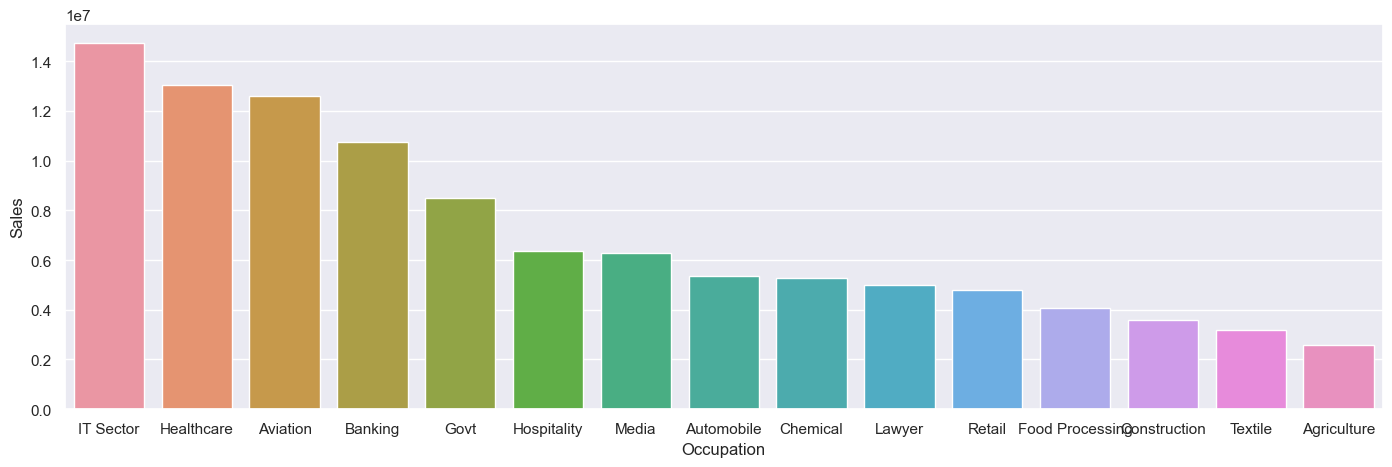

In [25]:
# Group the sales DataFrame by 'Occupation', calculate the total sales ('Sales') for each occupation,
# sort the results in descending order based on 'Sales', and store the result in 'occupation_sales'

occupation_sales = sales.groupby(['Occupation'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)

# Create a bar plot using seaborn to visualize the total sales ('Sales') by occupation ('Occupation')

sns.set(rc = {'figure.figsize': (17, 5)})
sns.barplot(data = occupation_sales, x = 'Occupation', y = 'Sales')

The graph illustrates that the top three occupations among most customers are in the IT sector, healthcare, and aviation.

In [26]:
## Product Category

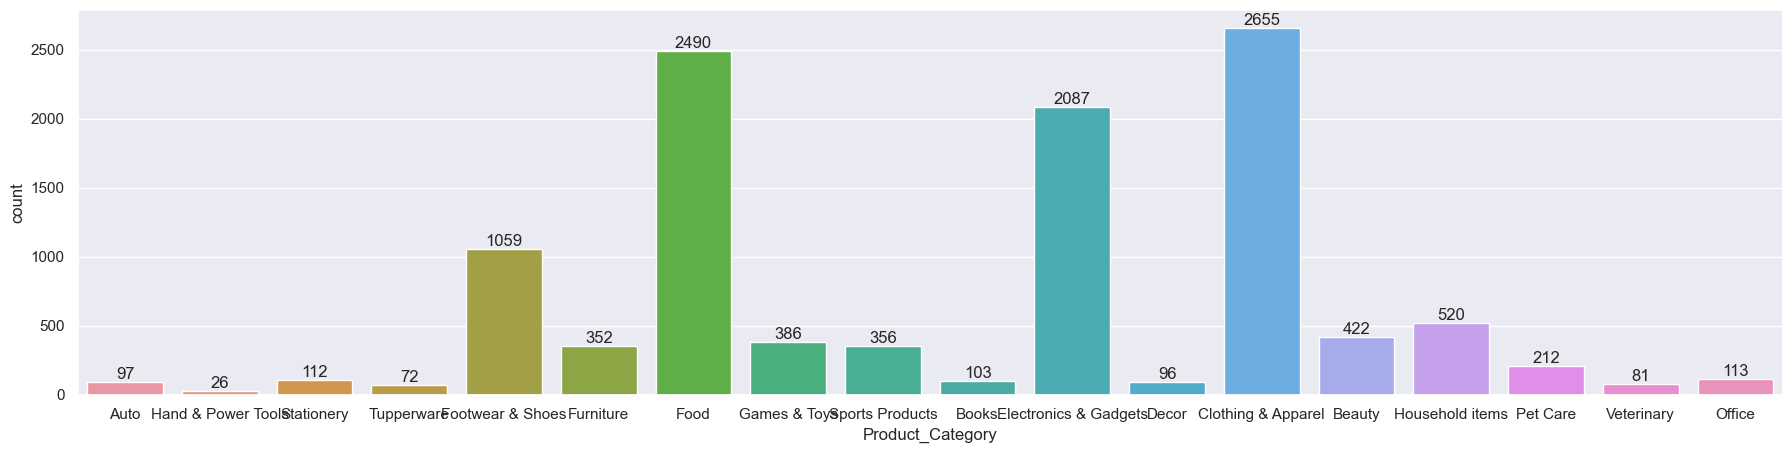

In [27]:
# Create a count plot using seaborn to visualize the count of each product category ('Product_Category')

sns.set(rc = {'figure.figsize' : (22, 5)})
pc = sns.countplot(data = sales, x = 'Product_Category')

for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Sales'>

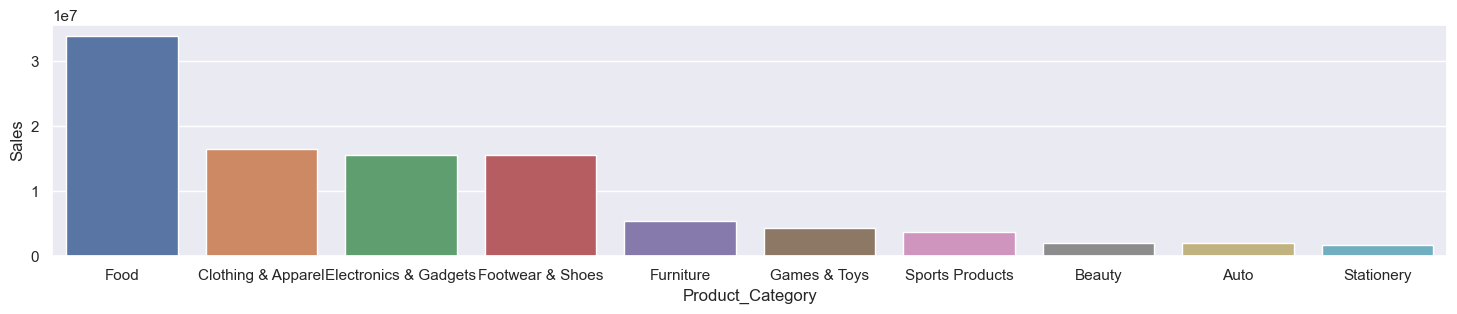

In [28]:
# Group the sales DataFrame by 'Product_Category', calculate the total sales ('Sales') for each product category,
# sort the results in descending order based on 'Sales', select the top 10 product categories,
# and store the result in 'sales_pc'

sales_pc = sales.groupby(['Product_Category'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False).head(10)

# Create a bar plot using seaborn to visualize the total sales ('Sales') for each product category ('Product_Category')

sns.set(rc = {'figure.figsize' : (18, 3)})
sns.barplot(data = sales_pc, x = 'Product_Category', y = 'Sales')

The majority of sales were observed in the product categories of Food, Clothing & Apparel, and Electronics & Gadgets.

## Product ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

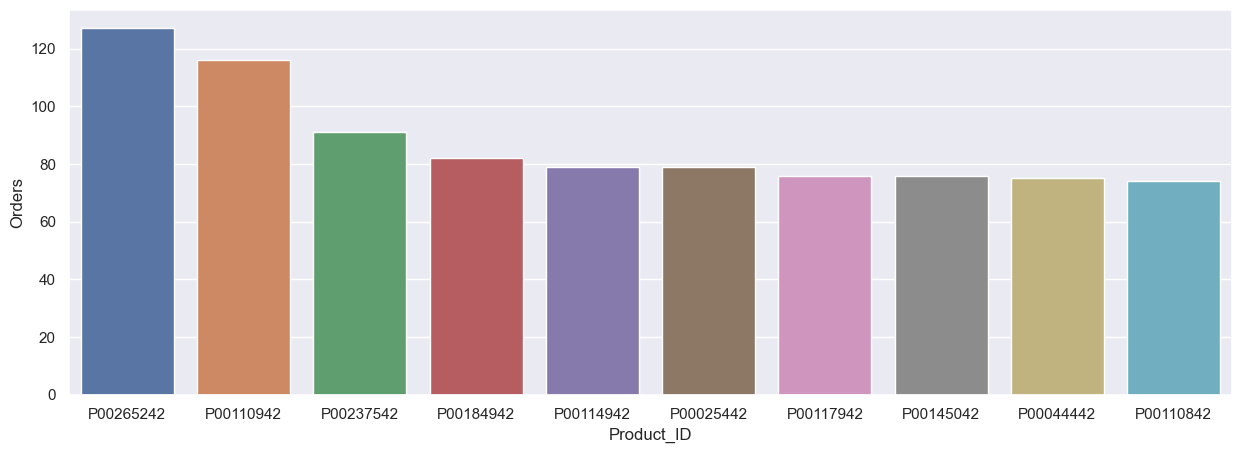

In [29]:
# Group the sales DataFrame by 'Product_ID', calculate the total number of orders ('Orders') for each product,
# sort the results in descending order based on 'Orders', select the top 10 products,
# and store the result in 'sales_id'

sales_id = sales.groupby('Product_ID', as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

# Create a bar plot using seaborn to visualize the total number of orders ('Orders') for each product ('Product_ID')

sns.set(rc = {'figure.figsize': (15, 5)})
sns.barplot(data = sales_id, x = 'Product_ID', y = 'Orders')

# Conclusion

The analysis indicates that married women, primarily employed in the IT, healthcare, and aviation sectors, and residing in Uttar Pradesh, Maharashtra, and Karnataka, have predominantly made purchases in the categories of Food, Clothing & Apparel, and Electronics & Gadgets. These purchases are largely concentrated among women aged between 26-35 years.